In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import os

In [2]:
# read the data from csv files.
south = pd.read_csv("C:\\Users\\Manas\\Desktop\\machine\\ap-south-1.csv",sep=",")
east = pd.read_csv("C:\\Users\\Manas\\Desktop\\machine\\ca-central-1.csv",sep=",")
west = pd.read_csv("C:\\Users\\Manas\\Desktop\\machine\\us-east-1.csv",sep=",")
central = pd.read_csv("C:\\Users\\Manas\\Desktop\\machine\\us-west-1.csv",sep=",")
south.info()

C:\Users\Manas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031033 entries, 0 to 2031032
Data columns (total 5 columns):
price            float64
datetime         object
instance_type    object
os               object
region           object
dtypes: float64(1), object(4)
memory usage: 77.5+ MB


In [3]:
east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881526 entries, 0 to 881525
Data columns (total 5 columns):
datetime         881526 non-null object
os               881526 non-null object
instance_type    881526 non-null object
price            881526 non-null float64
region           881526 non-null object
dtypes: float64(1), object(4)
memory usage: 33.6+ MB


In [65]:
south.head()

,price,datetime,instance_type,os,region
0,1.8865,2017-03-07 16:05:01,c4.8xlarge,Windows,ap-south-1b
1,0.0366,2017-03-07 16:05:01,m4.xlarge,Linux/UNIX,ap-south-1b
2,0.0243,2017-03-07 16:05:01,m4.large,Linux/UNIX,ap-south-1a
3,0.0346,2017-03-07 16:05:01,m4.large,Linux/UNIX,ap-south-1b
4,0.2895,2017-03-07 16:05:01,c4.8xlarge,Linux/UNIX,ap-south-1a


In [66]:
central.describe()

,price
count,4.047395e+06
mean,3.508133e-01
std,9.945959e-01
min,3.100000e-03
25%,1.214000e-01
50%,1.960000e-01
75%,3.722000e-01
max,8.501000e+01


Text(0,0.5,'Frequency')

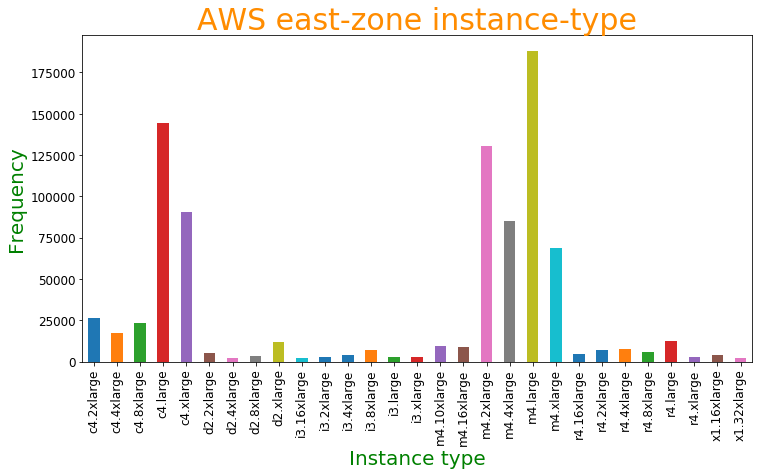

In [67]:
s=east.groupby('instance_type').size().plot("bar",figsize=(12,6),fontsize=12)
s.set_title("AWS east-zone instance-type",color='darkorange',fontsize=30)
s.set_xlabel("Instance type",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

Text(0,0.5,'Frequency')

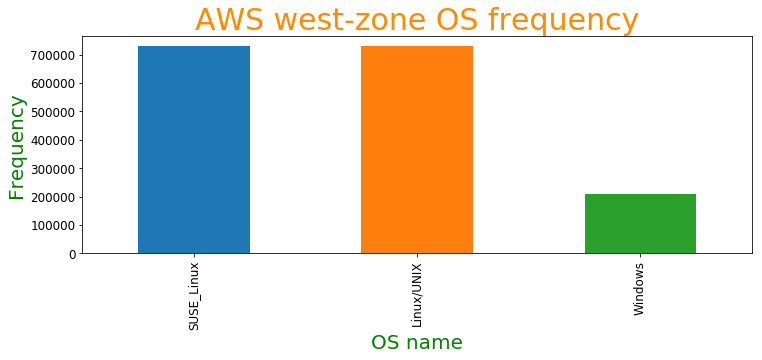

In [68]:
s=west['os'].value_counts().plot("bar",figsize=(12,4),fontsize=12)

# set the title and labels of the graph.
s.set_title("AWS west-zone OS frequency",color='darkorange',fontsize=30)
s.set_xlabel("OS name",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

Text(0,0.5,'Frequency')

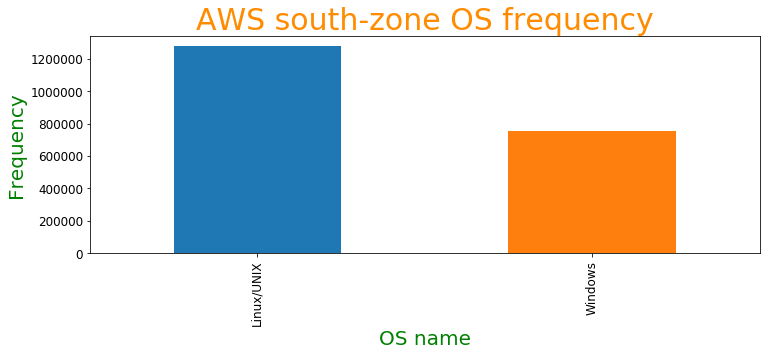

In [69]:
s=south['os'].value_counts().plot("bar",figsize=(12,4),fontsize=12)
s.set_title("AWS south-zone OS frequency",color='darkorange',fontsize=30)
s.set_xlabel("OS name",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

Text(0,0.5,'Frequency')

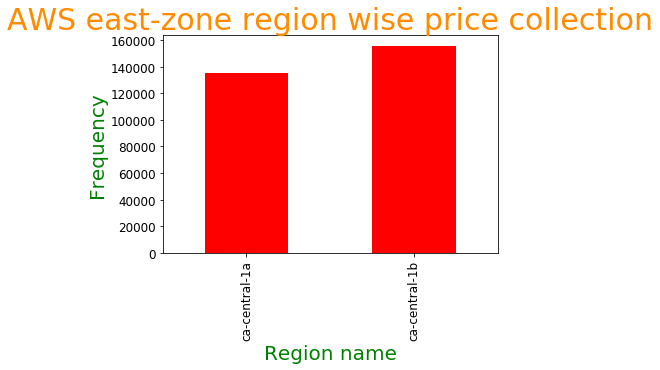

In [70]:
s=east.groupby('region').sum().plot(kind="bar",fontsize=12,color='r',legend=False)
s.set_title("AWS east-zone region wise price collection",color='darkorange',fontsize=30)
s.set_xlabel("Region name",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

Text(0,0.5,'Price')

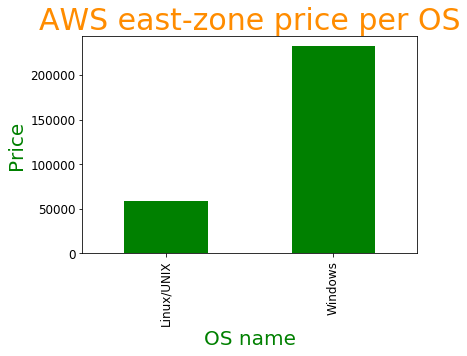

In [71]:
s=east.groupby('os').sum().plot(kind="bar",fontsize=12,color='g',legend=False)
s.set_title("AWS east-zone price per OS",color='darkorange',fontsize=30)
s.set_xlabel("OS name",color='g',fontsize=20)
s.set_ylabel("Price",color='g',fontsize=20)

In [72]:
# Grouping the data by instance type and OS.
d =east["instance_type"].unique()
s1=east.groupby('instance_type')['os'].value_counts()
s1.head()

instance_type  os        
c4.2xlarge     Linux/UNIX    22095
               Windows        4523
c4.4xlarge     Linux/UNIX    11982
               Windows        5398
c4.8xlarge     Linux/UNIX    16905
Name: os, dtype: int64

Text(0,0.5,'Frequency')

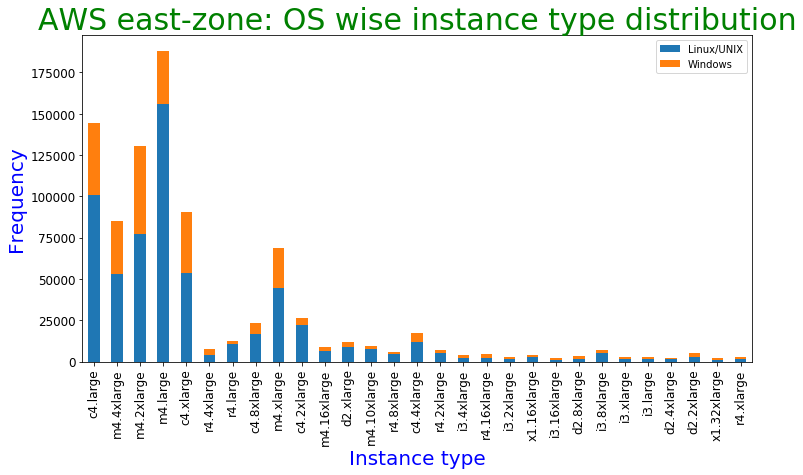

In [73]:
l=[]

# Creating a list of values for each OS.
for p in d:
    type_per_os = s1[p]
    l.append(type_per_os.values)

# Plotting the stacked bar graph for OS wise instance type distribution.
df = pd.DataFrame(l,index=d,columns=['Linux/UNIX','Windows'])
s=df.plot(kind="bar",stacked=True,figsize=(12,6),fontsize=12)
s.set_title("AWS east-zone: OS wise instance type distribution",color='g',fontsize=30)
s.set_xlabel("Instance type",color='b',fontsize=20)
s.set_ylabel("Frequency",color='b',fontsize=20)

In [74]:
d =east["instance_type"].unique()
# Grouping the data by instance type and Region name and counting the number of instances.
s1=east.groupby('instance_type')['region'].value_counts()
s1.head()

instance_type  region       
c4.2xlarge     ca-central-1a    16748
               ca-central-1b     9870
c4.4xlarge     ca-central-1a     9520
               ca-central-1b     7860
c4.8xlarge     ca-central-1b    12459
Name: region, dtype: int64

Text(0,0.5,'Frequency')

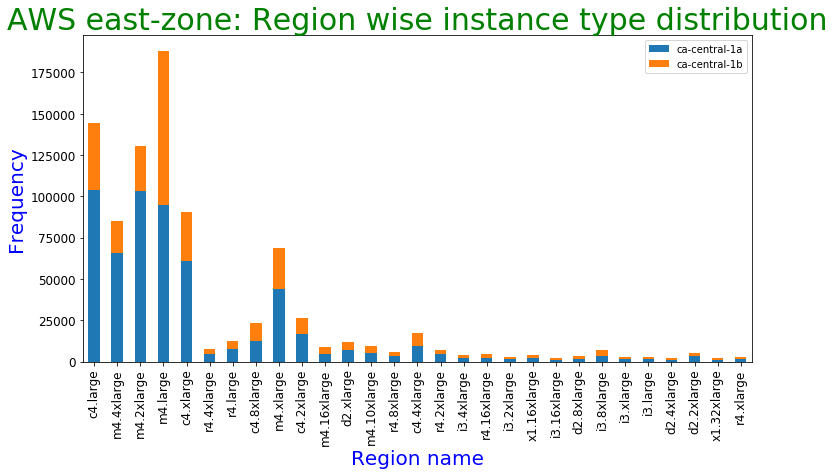

In [75]:
l=[]
for p in d:
    type_per_os = s1[p]
    l.append(type_per_os.values)

# Plotting the stacked bar graph for Region wise instance type distribution.
df = pd.DataFrame(l,index=d,columns=['ca-central-1a','ca-central-1b'])
s=df.plot(kind="bar",stacked=True,figsize=(12,6),fontsize=12)
s.set_title("AWS east-zone: Region wise instance type distribution",color='g',fontsize=30)
s.set_xlabel("Region name",color='b',fontsize=20)
s.set_ylabel("Frequency",color='b',fontsize=20)

In [77]:
central.dropna(inplace=True)

In [86]:
X1 = central.drop(['price','datetime'],axis=1)
central_df  = pd.get_dummies(X1)
X1 = central_df.values
y1 = central['price'].values

In [87]:
east.dropna(inplace=True)
X2 = east.drop(['price','datetime'],axis=1)
east_df= pd.get_dummies(X2)
X2 = east_df.values
y2 = east['price'].values

In [89]:
west.dropna(inplace=True)
X3 = west.drop(['price','datetime'],axis=1)
west_df= pd.get_dummies(X3)
X3 = west_df.values
y3 = west['price'].values

In [90]:
south.dropna(inplace=True)
X4 = south.drop(['price','datetime'],axis=1)
south_df= pd.get_dummies(X4)
X4 = south_df.values
y4 = south['price'].values

In [91]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test set.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42 )
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42 )
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2,random_state=42 )
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2,random_state=42 )

In [92]:
from sklearn.linear_model import SGDRegressor

# Fitting the SGDRegressor model on the training data.
clf1 = SGDRegressor()

# Fitting the model on the training data.
clf1.fit(X1_train,y1_train)

# Predicting the price on the test data.
y1_rbf = clf1.predict(X1_test)

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [95]:
from sklearn.metrics import mean_squared_error

# Calculating the mean squared error.
print(mean_squared_error(y1_test, y1_rbf))

0.8494545138899515


In [96]:
from sklearn.metrics import mean_absolute_error

# Calculating the mean absolute error.
print(mean_absolute_error(y1_test, y1_rbf))

0.1444998656616447


In [97]:
from sklearn.linear_model import SGDRegressor

# Fitting the SGDRegressor model on the training data.
clf2 = SGDRegressor()

# Fitting the model on the training data.
clf2.fit(X2_train,y2_train)

y2_rbf = clf2.predict(X2_test)

print(mean_squared_error(y2_test, y2_rbf))
print(mean_absolute_error(y2_test, y2_rbf))

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


2.614480856747158
0.29115321327662597


In [98]:
from sklearn.linear_model import SGDRegressor
clf3 = SGDRegressor()
clf3.fit(X3_train,y3_train)

y3_rbf = clf3.predict(X3_test)

print(mean_squared_error(y3_test, y3_rbf))
print(mean_absolute_error(y3_test, y3_rbf))

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


2.58890090237827
0.18703161696008475


In [99]:
from sklearn.linear_model import SGDRegressor
clf4 = SGDRegressor()
clf4.fit(X4_train,y4_train)

y4_rbf = clf4.predict(X4_test)

print(mean_squared_error(y4_test, y4_rbf))
print(mean_absolute_error(y4_test, y4_rbf))

C:\Users\Manas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


46.7401552918783
1.101582159051504


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the RandomForestRegressor model on the training data.
regr1 = RandomForestRegressor(max_depth=2, random_state=0)

# Fitting the model on the training data.
regr1.fit(X1_train, y1_train)

In [112]:
yregr1=regr1.predict(X1_test)

# Calculating the mean squared error.
print(mean_squared_error(y1_test, yregr1))
print(mean_absolute_error(y1_test, yregr1))

0.8935758355119244
0.2490387416425157


In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Calculating the cross validation score.
scores = cross_val_score(regr1, X1_train, y1_train, cv=5)
print(scores)


In [123]:
# Calculating the regression score.
regr1.score(X1_test,y1_test)

0.15922957606983656